<center>
  <a href="MLSD-02-DataPreprocessing-A.ipynb" target="_self">Data Preprocessing A</a> | <a href="./">Content Page</a> | <a href="MLSD-04-FeatureEngineering-A.ipynb">Feature Engineering A
</center>

# <center>DETECTING ANOMALIES</center>

<center><b>Copyright &copy 2023 by DR DANNY POO</b><br> e:dannypoo@nus.edu.sg<br> w:drdannypoo.com</center><br>

# Methods
- Standard Deviation<br>
- Boxplots<br>
- DBScan Clustering
- Isolation Forest

# Standard Deviation
- In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations.
- Therefore, if you have any data point that is <b>more than 3 times the standard deviation</b>, then those points are very likely to be <b>anomalous or outliers</b>.

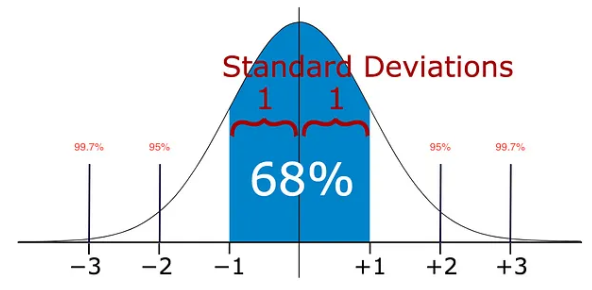

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Multiply and add by random numbers to get 50000 real values
np.random.seed(1)
random_data = np.random.randn(50000)  * 20 + 20
len(list(random_data))

50000

In [3]:
# Function to detect Outlier on one-dimensional datasets.
def find_anomalies(data):
    # Define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print("Lower limit: ", lower_limit)
    print("Upper limit: ", upper_limit)
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [4]:
anomalies = find_anomalies(random_data)
print("Number of anomalies in data = ", len(anomalies))
print(anomalies[0:5])

Lower limit:  -39.96482265609971
Upper limit:  80.11636224545514
Number of anomalies in data =  142
[80.61714224744061, 99.17205408075927, 86.4215751234073, -41.0752876085261, -43.06714900382097]


# Boxplots
- Box plots are a graphical depiction of numerical data through their quantiles. 
- An effective way to visualize outliers. 
- Think about the lower and upper whiskers as the boundaries of the data distribution. 
- Any data points that show above or below the whiskers, can be considered outliers or anomalous.

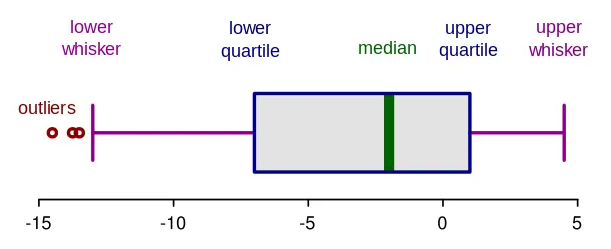

In [5]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

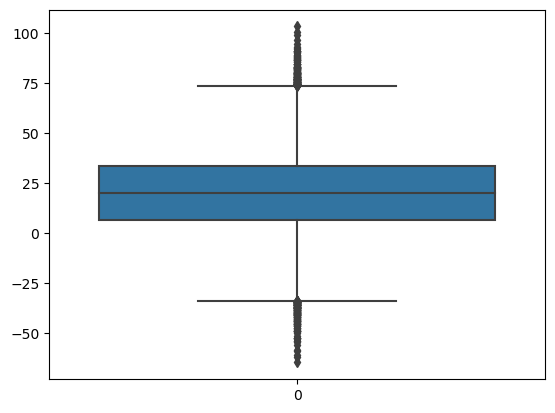

In [6]:
# Visualize boxplot
sns.boxplot(data=random_data)

**Observations**:
- It considers everything above 75 or below ~ -35 to be an outlier.

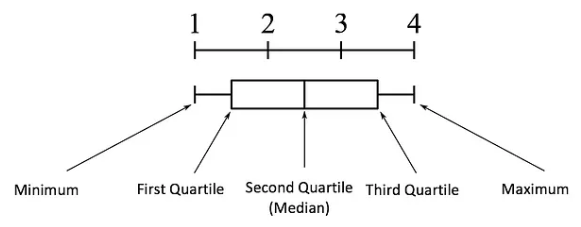

- Interquartile Range (IQR) is used to define the outliers. 
- It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). 
- Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or <b>boxplot lower whisker</b> or above (Q3 + 1.5x IQR) or <b>boxplot upper whisker</b>.

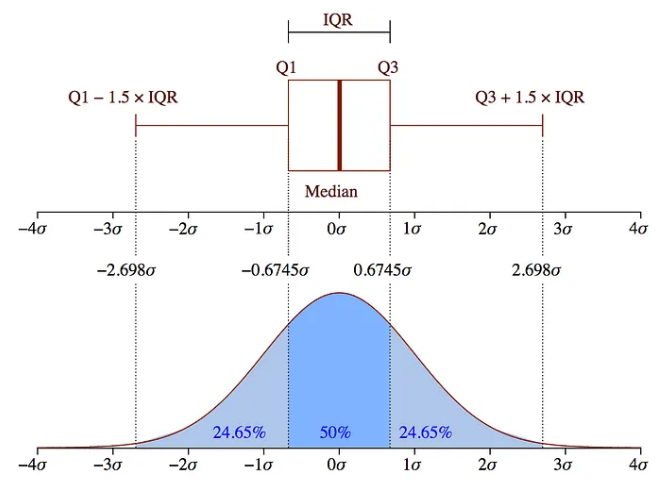


## Detecting Outliers with Boxplot Example

In [7]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read in data
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./data/boston/housing.txt', delim_whitespace=True, names=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
# Create features and target
array = df.values
X = array[:,0:13]
y = array[:,13]

In [9]:
# Print y shape and first 5 rows
print(y.shape, "\n", y[0:5])# Print X shape and first 5 rows
print(X.shape, "\n", X[0:5])

(506,) 
 [24.  21.6 34.7 33.4 36.2]
(506, 13) 
 [[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]


In [10]:
# Print y shape and first 5 rows
print(y.shape, "\n", y[0:5])

(506,) 
 [24.  21.6 34.7 33.4 36.2]


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

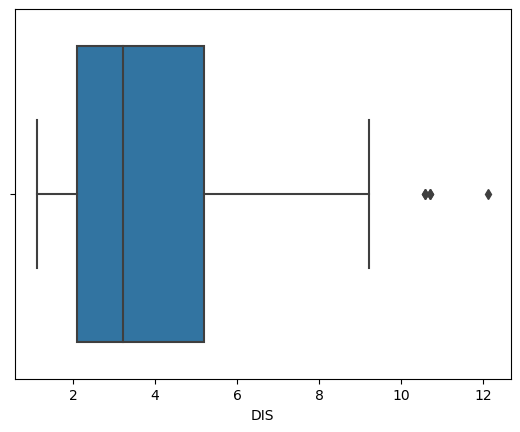

In [11]:
# Box Plot
import seaborn as sns
sns.boxplot(df['DIS'])

In [12]:
# Function to find outliers using IQR
def find_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    outliers = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return outliers

In [13]:
# Find outliers using find_outliers_IQR() function
outliers = find_outliers_IQR(df['DIS'])
print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))
print(outliers)
df['Outlier'] = outliers
print(df['Outlier'])

number of outliers: 5
max outlier value: 12.1265
min outlier value: 10.5857
351    10.7103
352    10.7103
353    12.1265
354    10.5857
355    10.5857
Name: DIS, dtype: float64
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
501   NaN
502   NaN
503   NaN
504   NaN
505   NaN
Name: Outlier, Length: 506, dtype: float64


In [14]:
# Position of the Outlier
print(np.where(df['DIS']>=outliers.min()))

(array([351, 352, 353, 354, 355], dtype=int64),)


In [15]:
print(df.isnull().sum())

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
Outlier    501
dtype: int64


In [16]:
# Convert NaN to False and True otherwise
df['Outlier'] = np.where(df['Outlier'].isnull(), False, True) 
print(df['Outlier'])

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: Outlier, Length: 506, dtype: bool


## Remove Rows with Outliers

In [17]:
# Remove rows with outliers
df.drop(df[df['Outlier'] == True].index, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     501 non-null    float64
 1   ZN       501 non-null    float64
 2   INDUS    501 non-null    float64
 3   CHAS     501 non-null    int64  
 4   NOX      501 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      501 non-null    float64
 7   DIS      501 non-null    float64
 8   RAD      501 non-null    int64  
 9   TAX      501 non-null    float64
 10  PTRATIO  501 non-null    float64
 11  B        501 non-null    float64
 12  LSTAT    501 non-null    float64
 13  MEDV     501 non-null    float64
 14  Outlier  501 non-null    bool   
dtypes: bool(1), float64(12), int64(2)
memory usage: 59.2 KB


# DBScan Clustering
- DBScan is a clustering algorithm that’s used cluster data into groups. 
- It is also used as a density-based anomaly detection method with either single or multi-dimensional data. 

<b>Core Points</b>: 
- First hyperparameter (HP)is min_samples. This is simply the minimum number of core points needed in order to form a cluster. 
- Second important HP is eps. eps is the maximum distance between two samples for them to be considered as in the same cluster.

<b>Border Points</b>:
- They are in the same cluster as core points but much further away from the centre of the cluster.

<b>Noise Points</b>:
- Data points that do not belong to any cluster. They can be anomalous or non-anomalous and they need further investigation. 

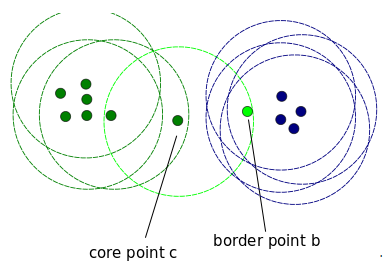


In [19]:
# Import libraries
from sklearn.cluster import DBSCAN

In [20]:
# Create random data
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

In [21]:
# Use DBScan to detect outliers
outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(random_data)
list(clusters).count(-1)

94

**Observations**
- The output is the total number of noisy points. 
- SKLearn labels the noisy points as (-1). 
- The downside with this method is that the higher the dimension, the less accurate it becomes. 

# Isolation Forest
- Isolation Forest is an unsupervised learning algorithm that belongs to the ensemble decision trees family. 
- This approach is different from all previous methods. All the previous ones were trying to find the normal region of the data then identifies anything outside of this defined region to be an outlier or anomalous.
- It explicitly isolates anomalies instead of profiling and constructing normal points and regions by assigning a score to each data point. 
- It takes advantage of the fact that anomalies are the minority data points and that they have attribute-values that are very different from those of normal instances. 
- This algorithm works great with very high dimensional datasets and it proved to be a very effective way of detecting anomalies.

In [22]:
# Import libraries
from sklearn.ensemble import IsolationForest
import numpy as np

In [23]:
# Create random data
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

In [24]:
# Use IsolationForest to detect outliers
clf = IsolationForest(max_samples=100, random_state=1, contamination='auto')
preds = clf.fit_predict(random_data)
print(preds, len(preds))

[-1  1 -1 ...  1  1  1] 50000


**Observations**
- This code will output the predictions for each data point in an array. 
- If the result is -1, it means that this specific data point is an outlier. 
- If the result is 1, then it means that the data point is not an outlier.

<center>
  <a href="MLSD-02-DataPreprocessing-A.ipynb" target="_self">Data Preprocessing A</a> | <a href="./">Content Page</a> | <a href="MLSD-04-FeatureEngineering-A.ipynb">Feature Engineering A
</center>